# Analyzing the convergence of the tumor cell fraction

## Import libraries

In [5]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.gaussian_process.kernels import ExpSineSquared, Matern, RBF, WhiteKernel, RationalQuadratic, DotProduct, ConstantKernel
from DataDenoising import DataDenoising

## Read *.csv* file

In [8]:
# data_filename = "Adjacent_averaging.csv"
data_filename = "Percentile_filter.csv"

data = np.genfromtxt("data/" + data_filename, dtype = float, delimiter = ',', names = True)
times = data["times"]
Ki67_negative_fraction = data["Ki67_negative_fraction"]
Ki67_positive_fraction = data["Ki67_positive_fraction"]

## Check convergence of the tumor cell fraction

In [9]:
def compare_to_mean(tumor_cell_fraction, label, tol = 3.0e-3):
    conv_time = -1
    for i in range(tumor_cell_fraction.size-1, -1, -1):
        mean = np.mean(tumor_cell_fraction[i:])
        if abs(mean - tumor_cell_fraction[i]) > tol:
            conv_time = times[i] + 1
            print(label + " fraction converged at t=" + str(conv_time) + " min")
            break
    if conv_time == -1:
        print(label + " fraction did not converge")
        
    return conv_time

In [10]:
Ki67_negative_conv_time = compare_to_mean(Ki67_negative_fraction, r'Ki67$^{-}$');
Ki67_positive_conv_time = compare_to_mean(Ki67_positive_fraction, r'Ki67$^{+}$');

Ki67$^{-}$ fraction converged at t=721.0 min
Ki67$^{+}$ fraction converged at t=721.0 min


## Plot convergence of the tumor cell fraction

<IPython.core.display.Javascript object>


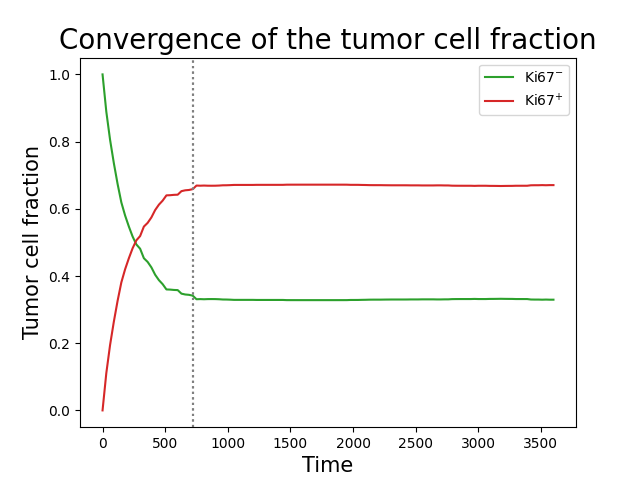

In [11]:
plt.clf()
plt.plot( times, Ki67_negative_fraction , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
plt.plot( times, Ki67_positive_fraction , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );

if Ki67_negative_conv_time != -1:
    plt.axvline(Ki67_negative_conv_time, color='tab:gray', linestyle=':')
if Ki67_positive_conv_time != -1:
    plt.axvline(Ki67_positive_conv_time, color='tab:gray', linestyle=':')
plt.legend()

plt.title( 'Convergence of the tumor cell fraction', size=20)
plt.xlabel( 'Time', size=15 ) 
plt.ylabel( 'Tumor cell fraction', size=15 )
plt.savefig("convergence_fraction.png", bbox_inches = 'tight')

## Compute Geweke convergence diagnosis

In [12]:
max_perc_to_discard = 0.4
max_size_to_discard = round(max_perc_to_discard*times.size)

def geweke(tumor_cell_fraction, label, rate_a = 0.1, rate_b = 0.5):
    relative_distances = np.zeros((max_size_to_discard,))
    for i in range(max_size_to_discard):
        window = np.delete(tumor_cell_fraction, slice(i), 0)

        ka = round(rate_a*window.size)
        kb = round(rate_b*window.size)

        subseq_a = window[:ka]
        subseq_b = window[(window.size-kb):]

        mean_a = np.mean(subseq_a)
        mean_b = np.mean(subseq_b)
        mean_total = np.mean(window)

        relative_distances[i] = abs((mean_a - mean_b)/mean_total)
    
    return relative_distances

In [13]:
Ki67_negative_relative_distances = geweke(Ki67_negative_fraction, r'Ki67$^{-}$');
Ki67_positive_relative_distances = geweke(Ki67_positive_fraction, r'Ki67$^{+}$');

## Plot Geweke convergence diagnosis

<IPython.core.display.Javascript object>


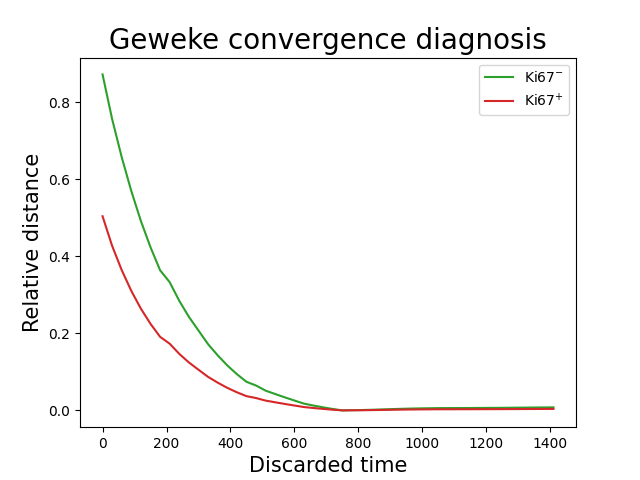

In [14]:
discarded_times = times[:max_size_to_discard]

plt.clf()
plt.plot( discarded_times, Ki67_negative_relative_distances , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
plt.plot( discarded_times, Ki67_positive_relative_distances , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
plt.legend()

plt.title( 'Geweke convergence diagnosis', size=20)
plt.xlabel( 'Discarded time', size=15 ) 
plt.ylabel( 'Relative distance', size=15 )
plt.savefig("geweke.png", bbox_inches = 'tight')

## Compute ergodic means

In [15]:
def ergodic_mean(tumor_cell_fraction, label):
    ergodic_means = np.zeros((tumor_cell_fraction.size,))
    for i in range(tumor_cell_fraction.size):
        ergodic_means[i] = np.mean(tumor_cell_fraction[:(i+1)])
        
    return ergodic_means

In [16]:
Ki67_negative_ergodic_means = ergodic_mean(Ki67_negative_fraction, r'Ki67$^{-}$');
Ki67_positive_ergodic_means = ergodic_mean(Ki67_positive_fraction, r'Ki67$^{+}$');

## Plot ergodic means

<IPython.core.display.Javascript object>


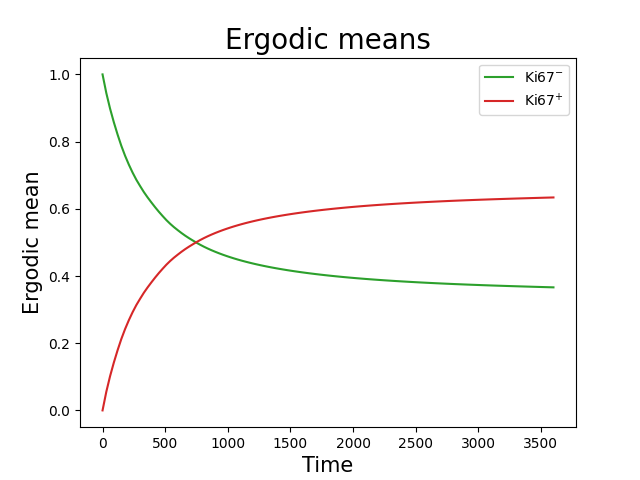

In [17]:
plt.clf()
plt.plot( times, Ki67_negative_ergodic_means , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
plt.plot( times, Ki67_positive_ergodic_means , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
plt.legend()

plt.title( 'Ergodic means', size=20)
plt.xlabel( 'Time', size=15 ) 
plt.ylabel( 'Ergodic mean', size=15 )
plt.savefig("ergodic_mean.png", bbox_inches = 'tight')

# Regularizing data before convergence analysis

## Read *.csv* file

<IPython.core.display.Javascript object>


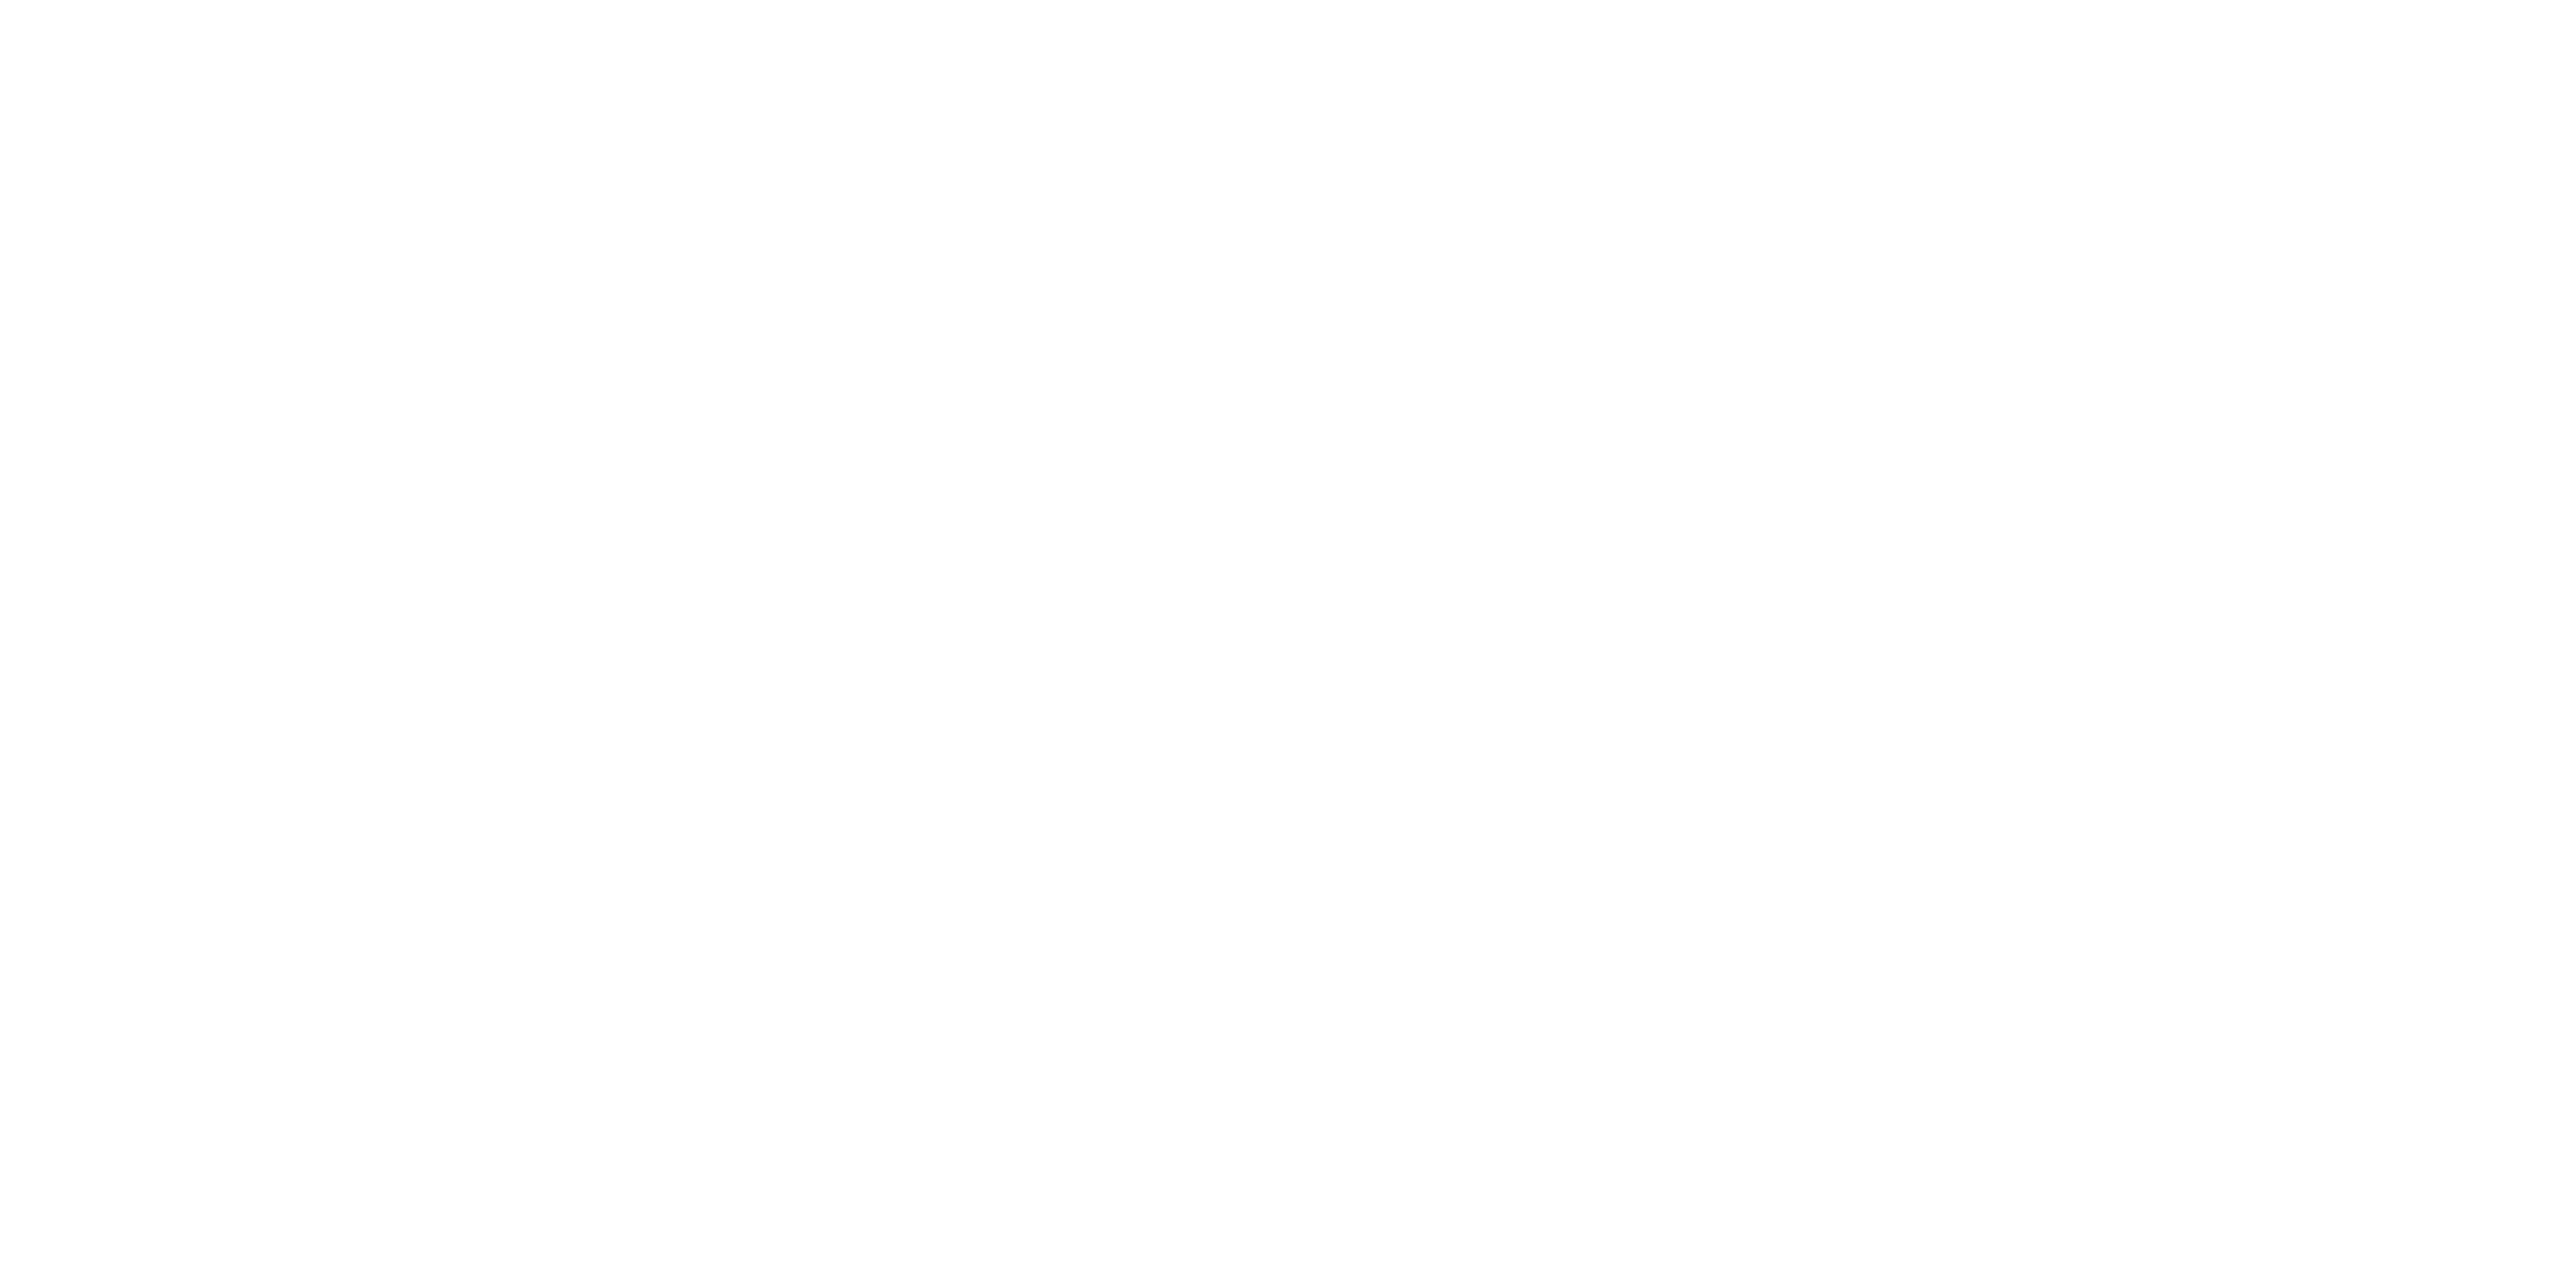

/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 250.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 250.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 500.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal 

<IPython.core.display.Javascript object>


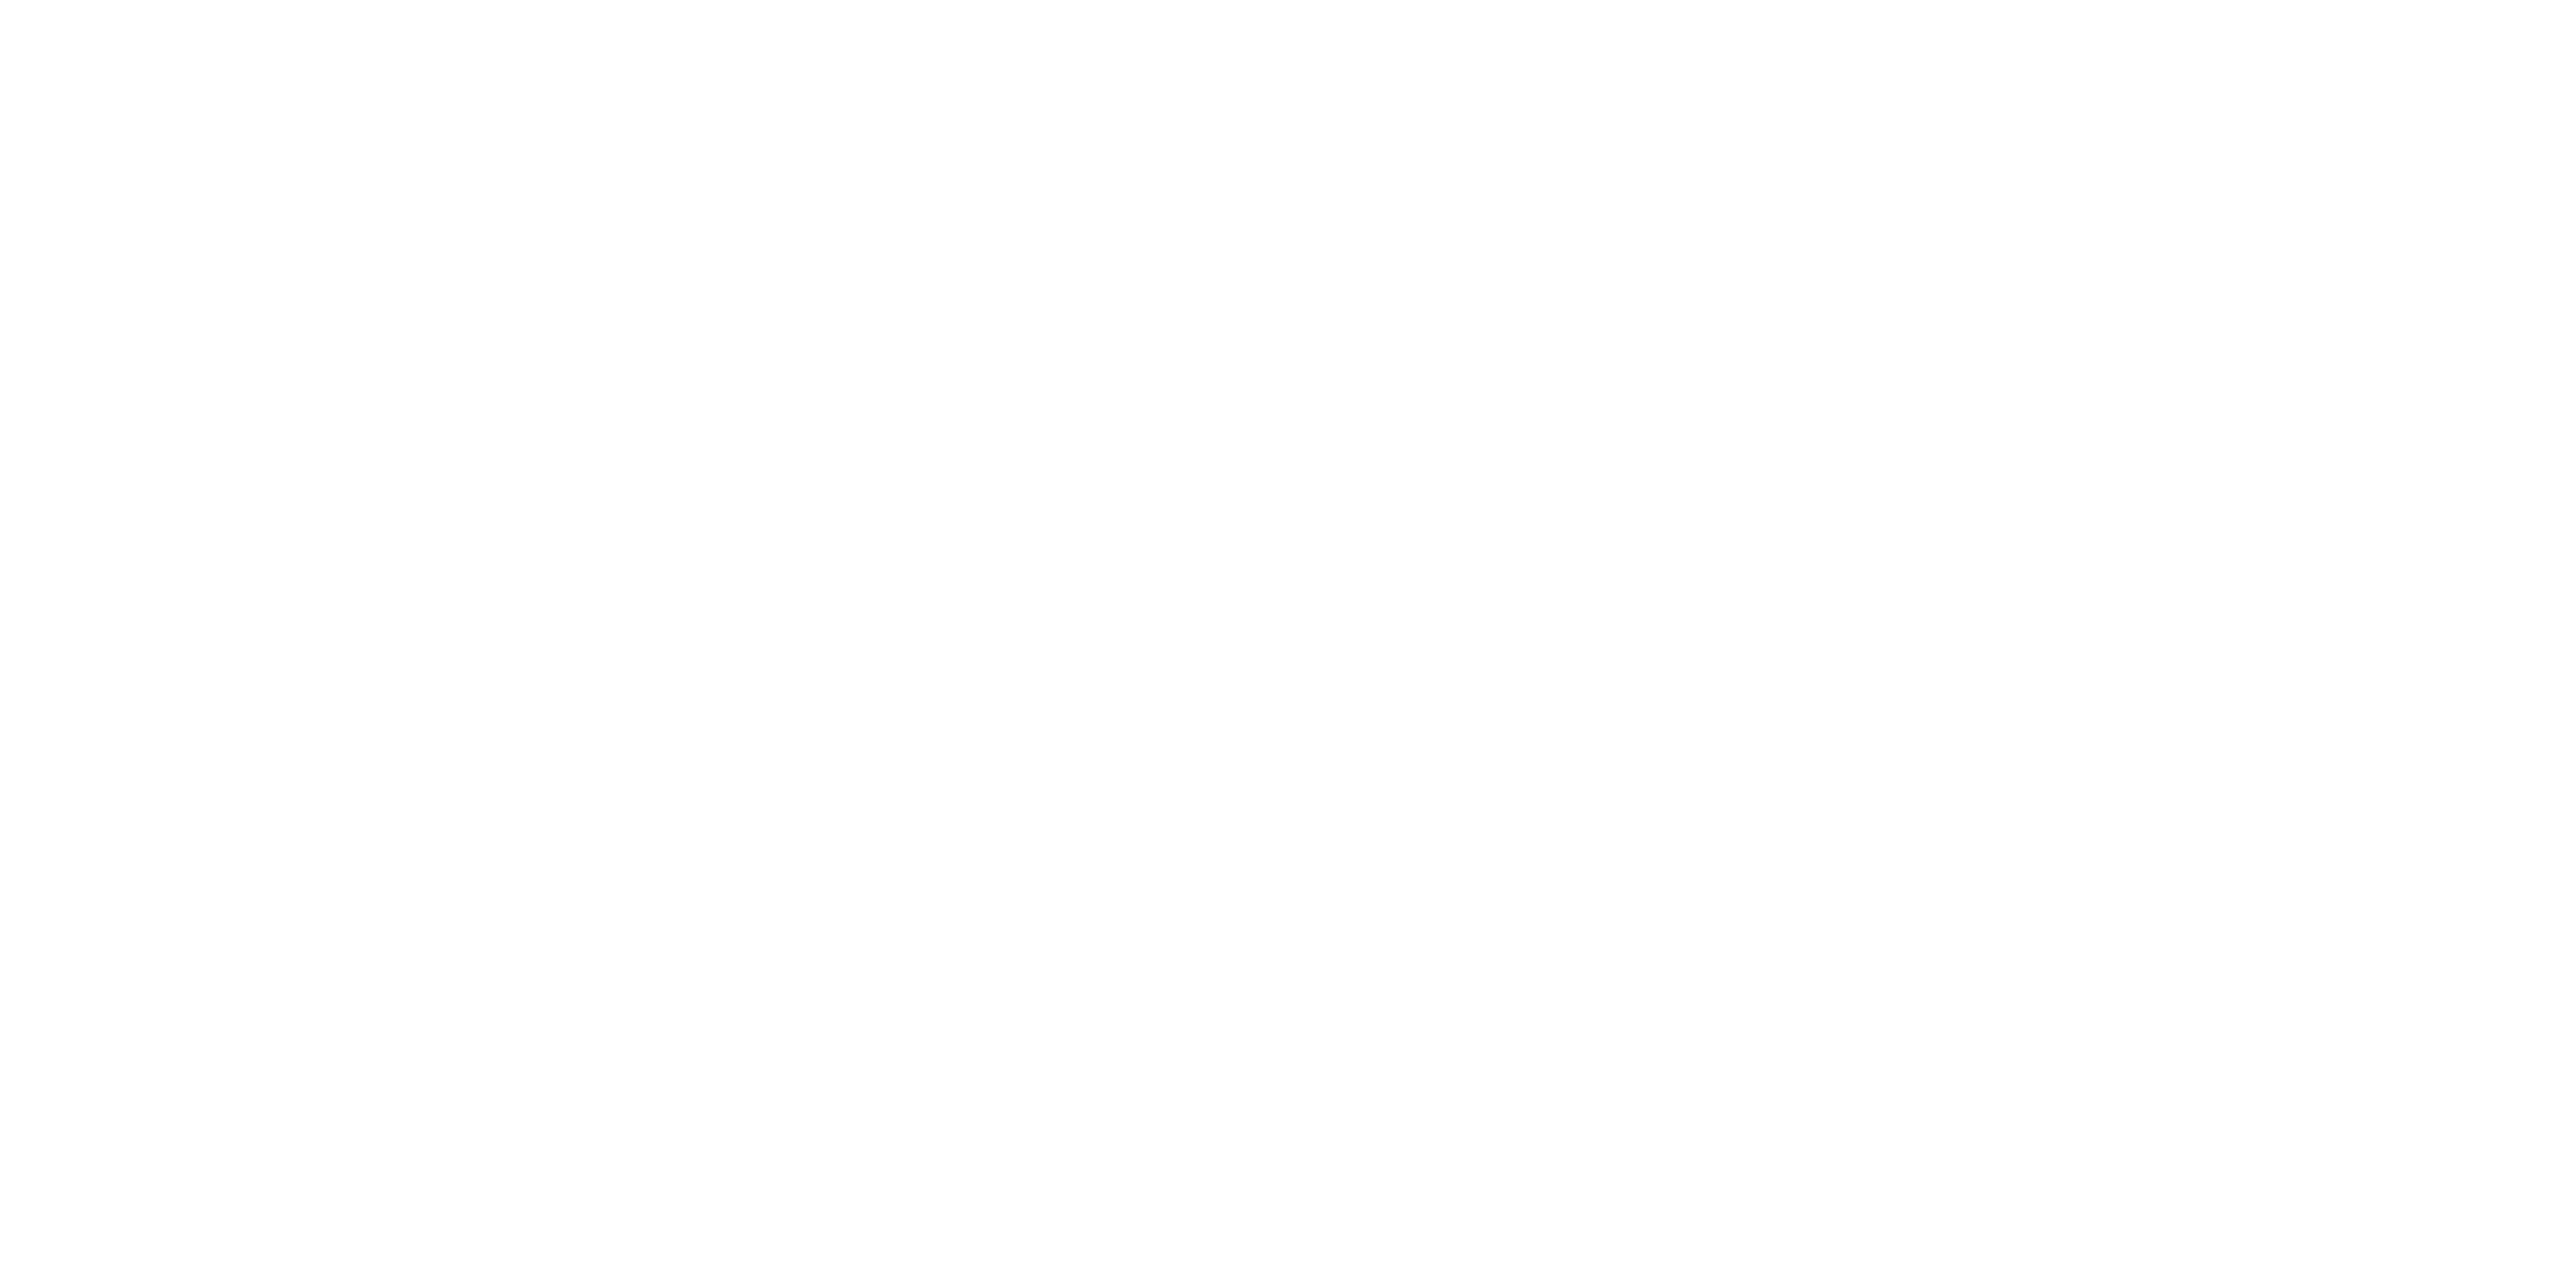

/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 250.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 250.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 500.0. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal 

In [6]:
data_filename = "data.csv"

data = np.genfromtxt("data/" + data_filename, dtype = float, delimiter = ',', names = True)
t = data["times"]
t_pred = np.linspace(t[0], t[-1], 3601)
X = np.stack((data["Ki67_negative_mean"], data["Ki67_positive_mean"]), axis = -1)

dd = DataDenoising(X, t, ["Ki67neg", "Ki67pos"])
dd.plot_gpr([RBF(length_scale_bounds = (2.5e2, 5.0e2)),
    RBF(length_scale_bounds = (5.0e2, 7.5e2)),
    RBF(length_scale_bounds = (7.5e2, 1.0e3)),
    RBF(length_scale_bounds = (1.0e3, 2.5e3))],
    [10], [1.0e-10], ["RBF1", "RBF2", "RBF3", "RBF4"], 0
)
X, X_min, X_max = dd.gaussian_process_regression(
    RBF(length_scale_bounds = (5.0e2, 7.5e2)),
    10, 1.0e-10, t_pred = t_pred
)

times = t_pred
Ki67_negative_mean = X[:,0]
Ki67_positive_mean = X[:,1]

## Plot the temporal evolution of the number of tumor cells

<IPython.core.display.Javascript object>


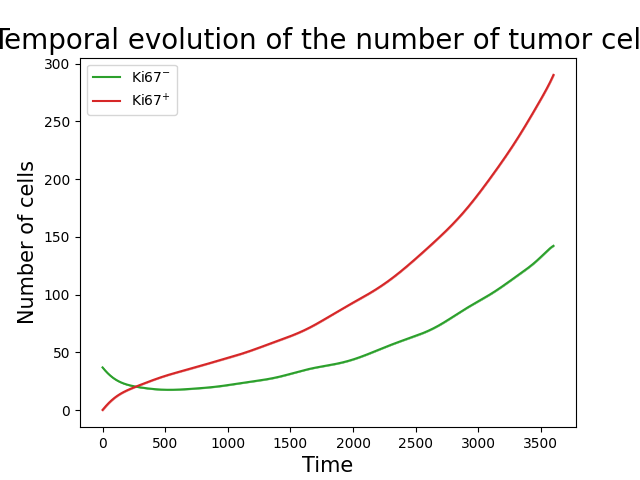

In [7]:
plt.clf()
plt.plot( times, Ki67_negative_mean , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
plt.plot( times, Ki67_positive_mean , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );

plt.fill_between( times, X_min[:,0], X_max[:,0], color = "tab:green", alpha = 0.4 );
plt.fill_between( times, X_min[:,1], X_max[:,1], color = "tab:red", alpha = 0.4 );
plt.legend()

plt.title( 'Temporal evolution of the number of tumor cells', size=20)
plt.xlabel( 'Time', size=15 ) 
plt.ylabel( 'Number of cells', size=15 )
plt.savefig("stochastic.png", bbox_inches = 'tight')

## Compute tumor cell fraction

In [8]:
total_mean = Ki67_negative_mean + Ki67_positive_mean;

Ki67_negative_fraction = Ki67_negative_mean/total_mean;
Ki67_positive_fraction = Ki67_positive_mean/total_mean;

## Check convergence of the tumor cell fraction

In [9]:
def compare_to_mean(tumor_cell_fraction, label, tol = 2.0e-2):
    conv_time = -1
    for i in range(tumor_cell_fraction.size-1, -1, -1):
        mean = np.mean(tumor_cell_fraction[i:])
        if abs(mean - tumor_cell_fraction[i]) > tol:
            conv_time = times[i] + 1
            print(label + " fraction converged at t=" + str(conv_time) + " min")
            break
    if conv_time == -1:
        print(label + " fraction did not converge")
        
    return conv_time

In [10]:
Ki67_negative_conv_time = compare_to_mean(Ki67_negative_fraction, r'Ki67$^{-}$');
Ki67_positive_conv_time = compare_to_mean(Ki67_positive_fraction, r'Ki67$^{+}$');

Ki67$^{-}$ fraction converged at t=610.0 min
Ki67$^{+}$ fraction converged at t=610.0 min


## Plot convergence of the tumor cell fraction

<IPython.core.display.Javascript object>


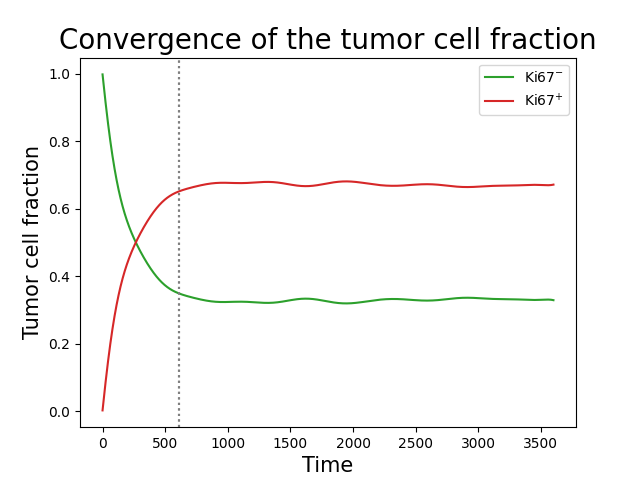

In [11]:
plt.clf()
plt.plot( times, Ki67_negative_fraction , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
plt.plot( times, Ki67_positive_fraction , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );

if Ki67_negative_conv_time != -1:
    plt.axvline(Ki67_negative_conv_time, color='tab:gray', linestyle=':')
if Ki67_positive_conv_time != -1:
    plt.axvline(Ki67_positive_conv_time, color='tab:gray', linestyle=':')
plt.legend()

plt.title( 'Convergence of the tumor cell fraction', size=20)
plt.xlabel( 'Time', size=15 ) 
plt.ylabel( 'Tumor cell fraction', size=15 )
plt.savefig("convergence_fraction.png", bbox_inches = 'tight')

## Compute Geweke convergence diagnosis

In [12]:
max_perc_to_discard = 0.4
max_size_to_discard = round(max_perc_to_discard*times.size)

def geweke(tumor_cell_fraction, label, rate_a = 0.1, rate_b = 0.5):
    relative_distances = np.zeros((max_size_to_discard,))
    for i in range(max_size_to_discard):
        window = np.delete(tumor_cell_fraction, slice(i), 0)

        ka = round(rate_a*window.size)
        kb = round(rate_b*window.size)

        subseq_a = window[:ka]
        subseq_b = window[(window.size-kb):]

        mean_a = np.mean(subseq_a)
        mean_b = np.mean(subseq_b)
        mean_total = np.mean(window)

        relative_distances[i] = abs((mean_a - mean_b)/mean_total)
    
    return relative_distances

In [13]:
Ki67_negative_relative_distances = geweke(Ki67_negative_fraction, r'Ki67$^{-}$');
Ki67_positive_relative_distances = geweke(Ki67_positive_fraction, r'Ki67$^{+}$');

## Plot Geweke convergence diagnosis

<IPython.core.display.Javascript object>


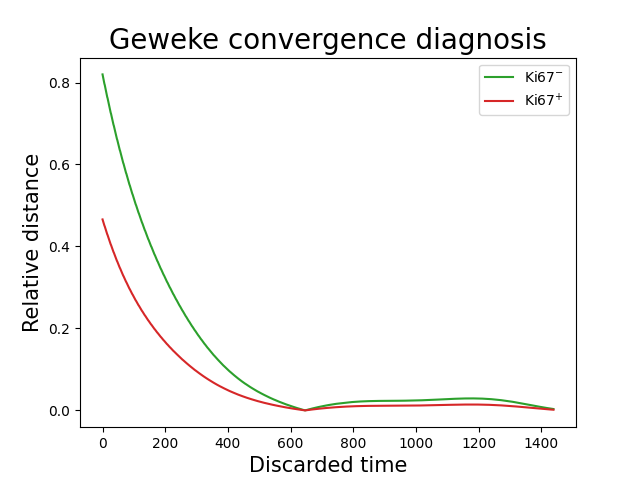

In [14]:
discarded_times = times[:max_size_to_discard]

plt.clf()
plt.plot( discarded_times, Ki67_negative_relative_distances , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
plt.plot( discarded_times, Ki67_positive_relative_distances , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
plt.legend()

plt.title( 'Geweke convergence diagnosis', size=20)
plt.xlabel( 'Discarded time', size=15 ) 
plt.ylabel( 'Relative distance', size=15 )
plt.savefig("geweke.png", bbox_inches = 'tight')

## Compute ergodic means

In [15]:
def ergodic_mean(tumor_cell_fraction, label):
    ergodic_means = np.zeros((tumor_cell_fraction.size,))
    for i in range(tumor_cell_fraction.size):
        ergodic_means[i] = np.mean(tumor_cell_fraction[:(i+1)])
        
    return ergodic_means

In [16]:
Ki67_negative_ergodic_means = ergodic_mean(Ki67_negative_fraction, r'Ki67$^{-}$');
Ki67_positive_ergodic_means = ergodic_mean(Ki67_positive_fraction, r'Ki67$^{+}$');

## Plot ergodic means

<IPython.core.display.Javascript object>


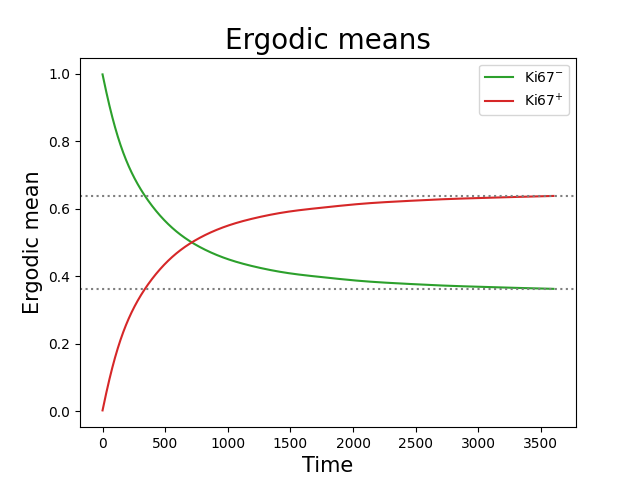

In [19]:
plt.clf()
plt.plot( times, Ki67_negative_ergodic_means , '-', label=r'Ki67$^{-}$', color='tab:green', alpha=1.0 );
plt.plot( times, Ki67_positive_ergodic_means , '-', label=r'Ki67$^{+}$', color='tab:red', alpha=1.0 );
plt.axhline( np.mean(Ki67_negative_fraction), color='tab:gray', linestyle=':' );
plt.axhline( np.mean(Ki67_positive_fraction), color='tab:gray', linestyle=':' );
plt.legend()

plt.title( 'Ergodic means', size=20)
plt.xlabel( 'Time', size=15 ) 
plt.ylabel( 'Ergodic mean', size=15 )
plt.savefig("ergodic_mean.png", bbox_inches = 'tight')